In [4]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir('../notebook_format')
from formats import load_style
load_style()

In [5]:
os.chdir(path)
%matplotlib inline
import numpy as np
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt

# Introduction to networkx

## Network Basics

Networks, a.k.a. graphs, are an immensely useful modelling tool to model complex relational problems. Networks are comprised of two main entities:

- Nodes: commonly represented as circles. In the academic literature, nodes are also known as "vertices".
- Edges: commonly represented as lines between circles.

Another way to think to it is, nodes are things you are interested in and edges denote the relationships between the things that you are interested in. Thus investigating a graph's edges is the more interesting part of network/graph analysis.

In a network, if two nodes are joined together by an edge, then they are neighbors of one another.
There are generally two types of networks - directed and undirected. In undirected networks, edges do not have a directionality associated with them. In directed networks, they do. Examples:

- Facebook's network: Individuals are nodes, edges are drawn between individuals who are FB friends with one another. undirected network.
- Air traffic network: Airports are nodes, flights between airports are the edges. directed network.

The key questions here are as follows. How do we:

- Model a problem as a network?
- Extract useful information from a network?


## networkx quickstart

In the networkx implementation, graph objects store their data in dictionaries. 

- Nodes are part of the attribute `Graph.node`, which is a dictionary where the key is the node ID and the values are a dictionary of attributes. 
- Edges are part of the attribute `Graph.edge`, which is a nested dictionary. Data are accessed as such: G.edge[node1][node2]['attr_name']. 

Because of the dictionary implementation of the graph, any hashable object can be a node. This means strings and tuples, but not lists and sets.

To get started, we'll use a synthetic social network, during which we will attempt to answer the following basic questions using the networkx API:

- How many people are present in the network?
- What is the distribution of attributes of the people in this network?
- How many relationships are represented in the network?
- What is the distribution of the number of friends that each person has?

In [6]:
G = nx.read_gpickle('Synthetic Social Network.pkl')

# .nodes() gives you what nodes (a list) are represented in the network
# here we access the number of nodes
print( len( G.nodes() ) )

# or equivalently
print( len(G) )

30
30


In [7]:
# Who is connected to who in the network?
# the edges are represented as a list of tuples,
# where each tuple represent the node that form the edges
# print out the first four to conserve space
G.edges()[:4]

[(0, 10), (0, 19), (0, 12), (1, 4)]

## Concept

A **network**, more technically known as a **graph**, is comprised of:

- a set of nodes
- joined by a set of edges

They can be represented as two lists:

1. A **node list**: a list of 2-tuples where the first element of each tuple is the representation of the node, and the second element is a dictionary of metadata associated with the node.
2. An **edge list**: a list of 3-tuples where the first two elements are the nodes that are connected together, and the third element is a dictionary of metadata associated with the edge.

Since this is a social network of people, there'll be attributes for each individual, such as age, and sex. We can grab that data off from the attributes that are stored with each node by adding the `data = True` argument. Let's get a list of nodes with their attributes.

In [8]:
# networkx will return a list of tuples in the form ( node_id, attribute_dictionary )
print( G.nodes( data = True )[:5] )

[(0, {'age': 20, 'sex': 'Male'}), (1, {'age': 21, 'sex': 'Female'}), (2, {'age': 19, 'sex': 'Male'}), (3, {'age': 29, 'sex': 'Female'}), (4, {'age': 30, 'sex': 'Male'})]


In [9]:
# excercise: Count how many males and females are represented in the graph
from collections import Counter
sex = [ d['sex'] for _, d in G.nodes( data = True ) ]
Counter(sex)

Counter({'Female': 15, 'Male': 15})

Edges can also store attributes in their attribute dictionary. Here the attribute is a datetime object representing the datetime in which the edges were created.

In [10]:
G.edges( data = True )[:4]

[(0, 10, {'date': datetime.datetime(2011, 6, 7, 0, 0)}),
 (0, 19, {'date': datetime.datetime(2011, 2, 12, 0, 0)}),
 (0, 12, {'date': datetime.datetime(2006, 8, 28, 0, 0)}),
 (1, 4, {'date': datetime.datetime(2009, 11, 8, 0, 0)})]

In [11]:
# excercise: figure out the range of dates during which these relationships were forged? 
# Specifically, compute the earliest and last date
dates = [ d['date'] for _, _, d in G.edges( data = True ) ]
print( min(dates) )
print( max(dates) )

2002-05-20 00:00:00
2011-11-04 00:00:00


## Exercise

We found out that there are two individuals that we left out of the network, individual no. 31 and 32. They are one male (31) and one female (32), their ages are 22 and 24 respectively, they knew each other on 2010-01-09, and together, they both knew individual 7, on 2009-12-11. Use the functions `G.add_node()` and `G.add_edge()` to add this data into the network.

For more info, there's the networkx's [tutorial](https://networkx.readthedocs.io/en/stable/tutorial/index.html).

In [12]:
G.add_node( 31, age = 22, sex = 'Male' )
G.add_node( 32, age = 24, sex = 'Female' )
G.add_edge( 31, 32, date = datetime( 2010, 1, 9 ) )
G.add_edge( 31, 7, date = datetime( 2009, 12, 11 ) )
G.add_edge( 32, 7, date = datetime( 2009, 12, 11 ) )

In [13]:
def test_graph_integrity(G):
    """verify that the implementation above is correct"""
    assert 31 in G.nodes()
    assert 32 in G.nodes()
    assert G.has_edge( 31, 32 )
    assert G.has_edge( 31, 7 )
    assert G.has_edge( 32, 7 )
    print('All tests passed.')
    
test_graph_integrity(G)

All tests passed.


Note that networkx will override the old data if you added duplicated ones. e.g. we start out with `G.add_node( 31, age = 22, sex = 'Male' )`, if we had another call `G.add_node( 31, age = 25, sex = 'Male' )`, then the age for node 31 will be 25.

## Coding Patterns

These are some recommended coding patterns when doing network analysis using networkx.

Iterating using List Comprehensions:

```python
[ d['attr'] for n, d in G.nodes( data = True ) ]
```

And if the node is unimportant, you can do:

```python
[ d['attr'] for _, d in G.nodes( data = True ) ]
```

A similar pattern can be used for edges:

```python
[ n1, n2 for n1, n2, _ in G.edges( data = True ) ]
[ d for _, _, d in G.edges( data = True ) ]
```

If the graph you are constructing is a directed graph, with a "source" and "sink" available, then I would recommend the following pattern:

```python
[ ( sc, sk ) for sc, sk, d in G.edges( data = True ) ]
```

## Visualizing Network

we can draw graphs using the `nx.draw()` function. The most popular format for drawing graphs is the **node-link diagram**. If the network is small enough to visualize, and the node labels are small enough to fit in a circle, then you can use the `with_labels = True` argument.

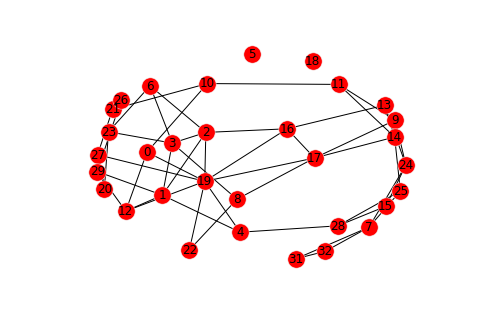

In [14]:
nx.draw( G, with_labels = True )

Another way is to use a **matrix** to represent them. This is done by using the `nx.to_numpy_matrix(G)` function. The nodes are on the x- and y- axes, and a filled square represent an edge between the nodes. 

We then use `matplotlib`'s `pcolor(numpy_array)` function to plot. Because `pcolor` cannot take in numpy matrices, we will cast the matrix as an array of arrays, and then get `pcolor` to plot it.

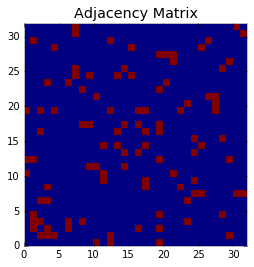

In [15]:
matrix = nx.to_numpy_matrix(G)

plt.pcolor(np.array(matrix))
plt.axes().set_aspect('equal') # set aspect ratio equal to get a square visualization
plt.xlim( min(G.nodes()), max(G.nodes()) ) # set x and y limits to the number of nodes present.
plt.ylim( min(G.nodes()), max(G.nodes()) )
plt.title('Adjacency Matrix')
plt.show()

# Hubs 

How do we evaluate the importance of some individuals in a network?

Within a social network, there will be certain individuals which perform certain important functions. For example, there may be hyper-connected individuals who are connected to many, many more people. They would be of use in the spreading of information. Alternatively, if this were a disease contact network, identifying them would be useful in stopping the spread of diseases. How would one identify these people?

## Approach 1: Neighbors

One way we could compute this is to find out the number of people an individual is conencted to. networkx let's us do this by giving us a `G.neighbors(node)` function.

In [16]:
# re-load the pickled data without the new individuals added in the introduction
G = nx.read_gpickle('Synthetic Social Network.pkl')

# the number of neighbors that individual #19 has
len( G.neighbors(19) )

8

In [17]:
# create a ranked list of the importance of each individual, 
# based on the number of neighbors they have?
node_neighbors = [ ( n, G.neighbors(n) ) for n in G.nodes() ]
sorted( node_neighbors, key = lambda x: len(x[1]), reverse = True )[:4]

[(19, [0, 16, 2, 4, 22, 17, 27, 12]),
 (1, [4, 2, 3, 12, 29]),
 (2, [16, 1, 3, 6, 19]),
 (3, [8, 1, 2, 6, 23])]

## Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. networkx implements a **degree centrality**, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using `nx.degree_centrality(G)`, which returns a dictionary (node is key, measure is value).

In [18]:
print( nx.degree_centrality(G)[19] )

# confirm by manual calculating
# remember to -1 to exclude itself to exclude self-loops,
# note that in some places it make senses to have self-loops ( e.g. bike routes )
print( len( G.neighbors(19) ) / ( len( G.nodes() ) - 1 ) )

0.27586206896551724
0.27586206896551724


Degree centrality and the number of neighbors is strongly related as they are both measuring whether a given node is a hub or not. By identifying the hub (e.g. linkedin influencer, the source that's spreading the disease) we can take actions on it to create value or prevent catastrophes.

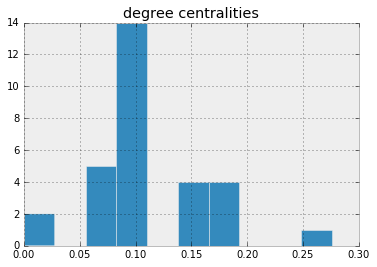

In [19]:
# exercise: create a histogram of the distribution of degree centralities
centrality = list( nx.degree_centrality(G).values() )

plt.hist(centrality)
plt.title('degree centralities')
plt.show()

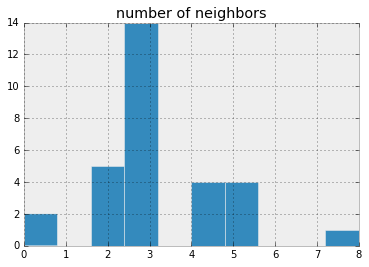

In [20]:
# excercise: create a histogram of the distribution of number of neighbors
neighbor = [ len(G.neighbors(n)) for n in G ]

plt.hist(neighbor)
plt.title('number of neighbors')
plt.show()

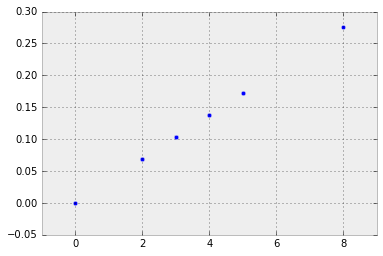

In [21]:
plt.scatter( neighbor, centrality )
plt.show()

# Paths in a Network

Graph traversal is akin to walking along the graph, node by node, restricted by the edges that connect the nodes. Graph traversal is particularly useful for understanding the local structure (e.g. connectivity, retrieving the exact relationships) of certain portions of the graph and for finding paths that connect two nodes in the network. 

Using the synthetic social network, we will figure out how do we find the shortest path to get from individual A to individual B?

One approach is what one would call a **breadth-first search**. It can be used on both directed and undirected graphs, but the graph's edges has to be unweighted.

The approach starts at a source node and explores the immediate neighbor nodes first before moving to the next level neighbors. In greater detail:

1. Begin with a queue of the starting node.
2. Add the neighbors of that node to the queue.
    1. If destination node is present in the queue, end.
    2. If destination node is not present, proceed.
3. For each node in the queue:
    1. Remove node from the queue.
    2. Add neighbors of the node to the queue. Check if destination node is present or not.
    3. If destination node is present, end.
    4. If destination node is not present, continue.
    
Try implementing this algorithm in a function. The function should take in two nodes, node1 and node2, and the graph G that they belong to, and return a Boolean that indicates whether a path exists between those two nodes or not.

In [22]:
from collections import deque

def path_exists( G, source, target ):
    """checks whether a path exists between two nodes (node1, node2) in graph G"""
    
    if not G.has_node(source):
        raise ValueError( 'Source node {} not in graph'.format(source) )
    if not G.has_node(target):
        raise ValueError( 'Target node {} not in graph'.format(target) )
    
    path_exist = False
    visited_node = set()
    queue = deque([source])

    while len(queue) != 0:
        node = queue.popleft()

        for neighbor in G.neighbors(node):
            if neighbor not in visited_node:
                if neighbor == target:
                    path_exist = True
                    break
                else:
                    visited_node.add(node)
                    queue.append(neighbor)

        if path_exist:
            break

    return path_exist

In [23]:
# 18 and any other node (should return False)
# 29 and 26 (should return True)
print( path_exists( G = G, source = 18, target = 5 ) )
print( path_exists( G = G, source = 29, target = 26 ) )

False
True


Meanwhile... thankfully, networkx has a function for us to use, titled [has_path](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.algorithms.shortest_paths.generic.has_path.html), so we don't have to implement this on our own. :-)



In [24]:
nx.has_path( G = G, source = 29, target = 26 )

True

networkx also has other shortest path algorithms [implemented](http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.shortest_paths.html). e.g. `nx.shortest_path(G, source, target)` gives us a list of nodes that exist within one of the shortest paths between the two nodes. 

We can build upon these to build our own graph query functions. Let's see if we can trace the shortest path from one node to another. Hint: You may want to use `G.subgraph(iterable_of_nodes)` to extract just the nodes and edges of interest from the graph `G`

In [25]:
nx.shortest_path( G, 4, 14 )

[4, 19, 17, 14]

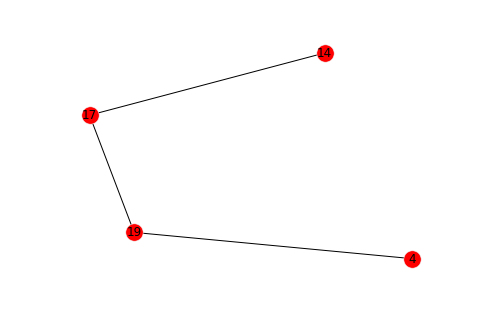

In [26]:
source = 4
target = 14

def extract_path_edges( G, source, target ):
    # check to make sure that a path does exists between source and target.
    new_G = None
    if nx.has_path( G, source, target ):
        nodes_of_interest = nx.shortest_path( G, source, target )
        new_G = G.subgraph(nodes_of_interest)
    
    return new_G

new_G = extract_path_edges( G, source, target )
nx.draw( new_G, with_labels = True )

## Hubs Revisited

It looks like individual 19 is an important person of some sorts - if a message has to be passed through the network in the shortest time possible, then usually it'll go through person 19. Such a person has a high **betweenness centrality**. This is implemented as one of NetworkX's centrality algorithms. Check out the [Wikipedia page](http://en.wikipedia.org/wiki/Betweenness_centrality) for a further description.

Note that degree centrality and betweenness centrality don't necessarily correlate.

$$ c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

where `V` is the set of nodes, $\sigma(s, t)$ is the number of shortest `(s, t)` paths, and $\sigma(s, t|v)$ is the number of those paths  passing through some  node `v` other than `s, t`.

In [27]:
nx.betweenness_centrality( G, normalized = False )[19]

110.50595238095238

# Cliques, Triangles and Squares

Let's pose a problem: If A knows B and B knows C, would it be probable that A knows C as well? In a graph involving just these three individuals, it may look as such:

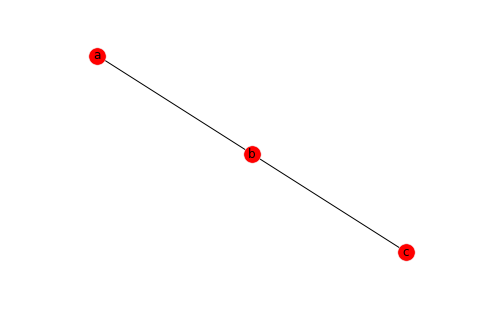

In [28]:
G = nx.Graph()
G.add_nodes_from([ 'a', 'b', 'c' ])
G.add_edges_from([ ('a','b'), ('b', 'c') ])
nx.draw( G, with_labels = True )

Let's think of another problem: If A knows B, B knows C, C knows D and D knows A, is it likely that A knows C and B knows D? How would this look like?

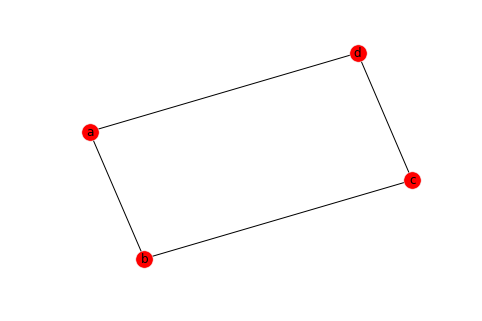

In [29]:
G.add_node('d')
G.add_edge('c', 'd')
G.add_edge('d', 'a')
nx.draw( G, with_labels = True )

The set of relationships involving A, B and C, if closed, involves a triangle in the graph. The set of relationships that also include D form a square. You may have observed that social networks (LinkedIn, Facebook, Twitter etc.) have friend recommendation systems. How exactly do they work? Apart from analyzing other variables, closing triangles is one of the core ideas behind the system. A knows B and B knows C, then A probably knows C as well.

## Cliques

In a social network, **cliques** are groups of people in which everybody knows everybody. Triangles are a simple example of **cliques**. Let's try implementing a simple algorithm that finds out whether a node is present in a triangle or not.

The core idea is that if a node is present in a triangle, then its neighbors' neighbors' neighbors should include itself.

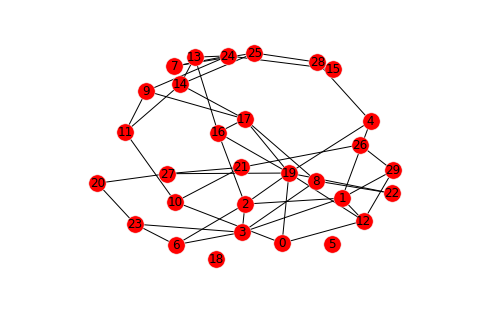

In [33]:
# reload the network
G = nx.read_gpickle('Synthetic Social Network.pkl')
nx.draw( G, with_labels = True )

## Exercise

Write a function that takes in one node and its associated graph as an input, and returns a list or set of itself + all other nodes that it is in a triangle relationship with.

Hint: The neighbor of my neighbor should also be my neighbor, then the three of us are in a triangle relationship.

In [34]:
def get_triangles( G, node ):
    
    # store all the data points that are in a triangle
    # include the targeted node to draw sub-graph later
    triangles = set([node])
    neighbors1 = set( G.neighbors(node) )
    for n in neighbors1:
        
        # if the target node is in a triangle relationship, then
        # the target node's neighbor's neighbor
        # should intersect with the target node's neighbor
        neighbors2 = set( G.neighbors(n) )
        triangle = neighbors1.intersection(neighbors2)
        
        # if the intersection exists, add the point (the first neighbor) and 
        # the set (second neighbor)
        if triangle:
            triangles.update(triangle)
            triangles.add(n)
    
    return triangles

{1, 2, 3, 6, 23}


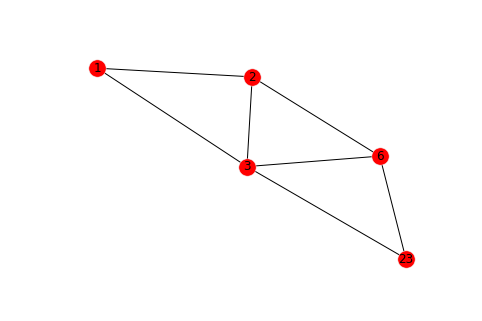

In [35]:
print( get_triangles( G = G, node = 3 ) )

# drawing out the subgraph composed of those nodes to verify
nx.draw( G.subgraph( get_triangles( G = G, node = 3 ) ), with_labels = True )

## Friend Recommendation: Open Triangles

Let's see if we can do some friend recommendations by looking for open triangles. Open triangles are like those that we described earlier on - A knows B and B knows C, but C's relationship with A isn't captured in the graph.

In [36]:
def get_open_triangles( G, node ):
    # the target node's neighbor's neighbor's neighbor's should
    # not include the target node
    open_triangles = []
    neighbors1 = set( G.neighbors(node) )

    for node1 in neighbors1:
        # remove the target node from the target node's neighbor's
        # neighbor's, since it will certainly go back to itself
        neighbors2 = set( G.neighbors(node1) )
        neighbors2.discard(node)

        for node2 in neighbors2:
            neighbors3 = set( G.neighbors(node2) )

            if node not in neighbors3:
                open_triangle = set([node])
                open_triangle.update([ node1, node2 ])
                open_triangles.append(open_triangle)
    
    return open_triangles

In [37]:
open_triangles = get_open_triangles( G = G, node = 3 )
open_triangles

[{3, 8, 17},
 {3, 8, 22},
 {1, 3, 29},
 {1, 3, 4},
 {1, 3, 12},
 {2, 3, 16},
 {2, 3, 19},
 {3, 20, 23}]

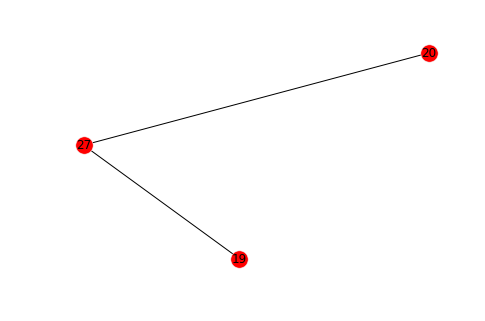

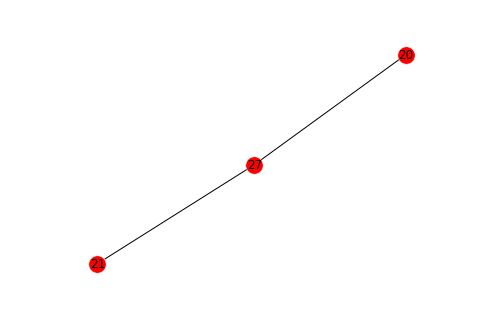

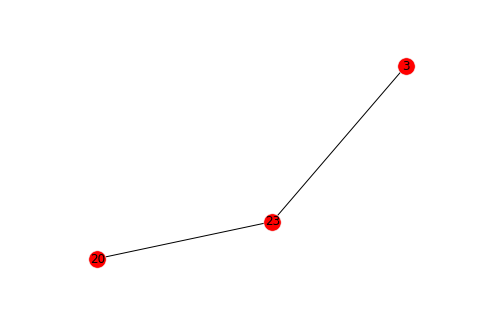

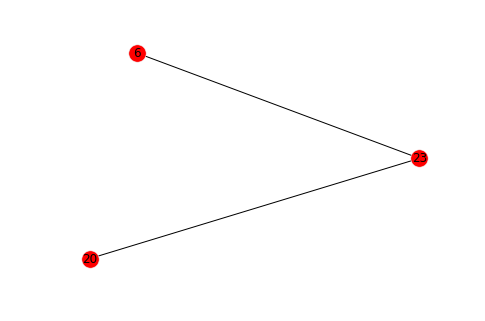

In [38]:
# draw out each of the triplets.
nodes = get_open_triangles( G = G, node = 20 )
for i, triplet in enumerate(nodes):
    fig = plt.figure(i)
    nx.draw( G.subgraph(triplet), with_labels = True )

# Tables to Networks, Networks to Tables

Networks can be represented in a tabular form in two ways: As an adjacency list with edge attributes stored as columnar values, and as a node list with node attributes stored as columnar values.

Storing the network data as a single massive adjacency table, with node attributes repeated on each row, can get unwieldy, especially if the graph is large, or grows to be so. One way to get around this is to store two files: one with node data and node attributes, and one with edge data and edge attributes. 

The Divvy bike sharing dataset is one such example of a network data set that has been stored as such. The data set is comprised of the following data:

- Stations and metadata (like a node list with attributes saved)
- Trips and metadata (like an edge list with attributes saved)

Download the file from [dropbox](https://www.dropbox.com/sh/wzs8dnfw6zur4lc/AAC2fu_q44umOedX6cnSKGLba?dl=0). The `README.txt` file in the Divvy directory should help orient you around the data.

In [39]:
import pandas as pd

In [40]:
stations = pd.read_csv(
    'divvy_2013/Divvy_Stations_2013.csv', 
    parse_dates = ['online date'], 
    index_col = 'id', 
    encoding = 'utf-8'
)
# the id represents the node
stations.head()

,name,latitude,longitude,dpcapacity,landmark,online date
id,,,,,,
5,State St & Harrison St,41.873958,-87.627739,19,30,2013-06-28
13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,66,2013-06-28
14,Morgan St & 18th St,41.858086,-87.651073,15,163,2013-06-28
15,Racine Ave & 18th St,41.858181,-87.656487,15,164,2013-06-28
16,Wood St & North Ave,41.910329,-87.672516,15,223,2013-08-12


In [41]:
trips = pd.read_csv(
    'divvy_2013/Divvy_Trips_2013.csv', 
    parse_dates = ['starttime', 'stoptime'], 
    index_col = ['trip_id']
)
# the from_station_id and to_station_id represents
# the two nodes that the edge connects
trips.head()

,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
trip_id,,,,,,,,,,,
4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN
4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN
4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN
4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN


At this point, we have our `stations` and `trips` data loaded into memory. 

How we construct the graph depends on the kind of questions we want to answer, which makes the definition of the "unit of consideration" (or the entities for which we are trying to model their relationships) is extremely important. 

Let's try to answer the question: "What are the most popular trip paths?" In this case, the bike station is a reasonable "unit of consideration", so we will use the bike stations as the nodes. 

To start, we'll initialize an directed graph `G` and add in the nodes and edges.

In [42]:
# call the pandas DataFrame row-by-row iterator, which
# iterates through the index, and columns
G = nx.DiGraph()
for n, d in stations.iterrows(): 
    G.add_node( n, attr_dict = d.to_dict() )
    
# use groupby to retrieve the pair of nodes and the data count
for ( start, stop ), d in trips.groupby([ 'from_station_id', 'to_station_id' ]):
    G.add_edge( start, stop, count = len(d) )

In [43]:
# notice that there're self-loops
print( G.edges( data = True )[:4] )
print()

# examine the density (the proportion of nodes that are connected)
num_edges = len( G.edges() )
num_possible_edges = len( G.nodes() ) ** 2
density = num_edges / num_possible_edges
print( 'density:', density )

[(5, 5, {'count': 232}), (5, 13, {'count': 1}), (5, 14, {'count': 15}), (5, 15, {'count': 9})]

density: 0.4935777777777778


## Saving NetworkX Graph Files

NetworkX's API offers many formats for storing graphs to disk. If you intend to work exclusively with NetworkX, then pickling the file to disk is probably the easiest way.

To write to disk: 

```python
nx.write_gpickle( G, handle )

# e.g.
nx.write_gpickle( G, 'datasets/divvy_2013/divvy_graph.pkl' )
```

To load from disk:

```python   
G = nx.read_gpickle(handle)
```

## Reference

- [PyCon 2016: Practical Network Analysis Made Simple](https://www.youtube.com/watch?v=jdvlZJKK4F0)
- [Video above's Github respository](https://github.com/ericmjl/Network-Analysis-Made-Simple)